## Suicide Rates-Overview(1985-to-2021)

Suicide is a significant public health concern that affects individuals, families, and communities. In this project, we will explore the trends and patterns in suicide rates from 1985 to 2021. 
### Objectives and goals
Through our analysis, we will gain a better understanding of the factors that contribute to suicide and the populations that are most at risk. By providing an overview of the current state of suicide rates, this project aims to raise awareness and support efforts to prevent suicide.

Importing Libraries

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Viewing the Dataset

In [326]:
# Load the dataset
df = pd.read_csv('suicide_data.csv')
# Display the first 3 rows
df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X


In [327]:
#shape of the data
df.shape

(31756, 12)

In [328]:
#data info
df.info

<bound method DataFrame.info of                         country  year     sex          age  suicides_no  \
0                       Albania  1987    male  15-24 years         21.0   
1                       Albania  1987    male  35-54 years         16.0   
2                       Albania  1987  female  15-24 years         14.0   
3                       Albania  1987    male    75+ years          1.0   
4                       Albania  1987    male  25-34 years          9.0   
...                         ...   ...     ...          ...          ...   
31751                   Ukraine  2017  female    75+ years        256.0   
31752            United Kingdom  2017  female    75+ years        104.0   
31753  United States of America  2017  female    75+ years        501.0   
31754                   Uruguay  2017  female    75+ years         14.0   
31755                Uzbekistan  2017  female    75+ years          3.0   

       population  suicides/100k pop                  country-year 

## Data Cleaning

### Handling missing values. 


In [333]:
#checking null values
df.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          418
gdp_for_year            0
gdp_per_capita ($)      0
generation              0
dtype: int64

In [335]:
#replace HDI column with its mean based on the country
# droping rows of suicide no with missing values
df.dropna(subset=['suicides_no', 'population'], inplace=True)
df['HDI for year'] = df.groupby('country')['HDI for year'].transform(lambda x: x.fillna(x.mean()))
df.dropna(subset=['HDI for year'], inplace=True)


In [336]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
gdp_for_year          0
gdp_per_capita ($)    0
generation            0
dtype: int64

### Identifying and dealing with outliers.

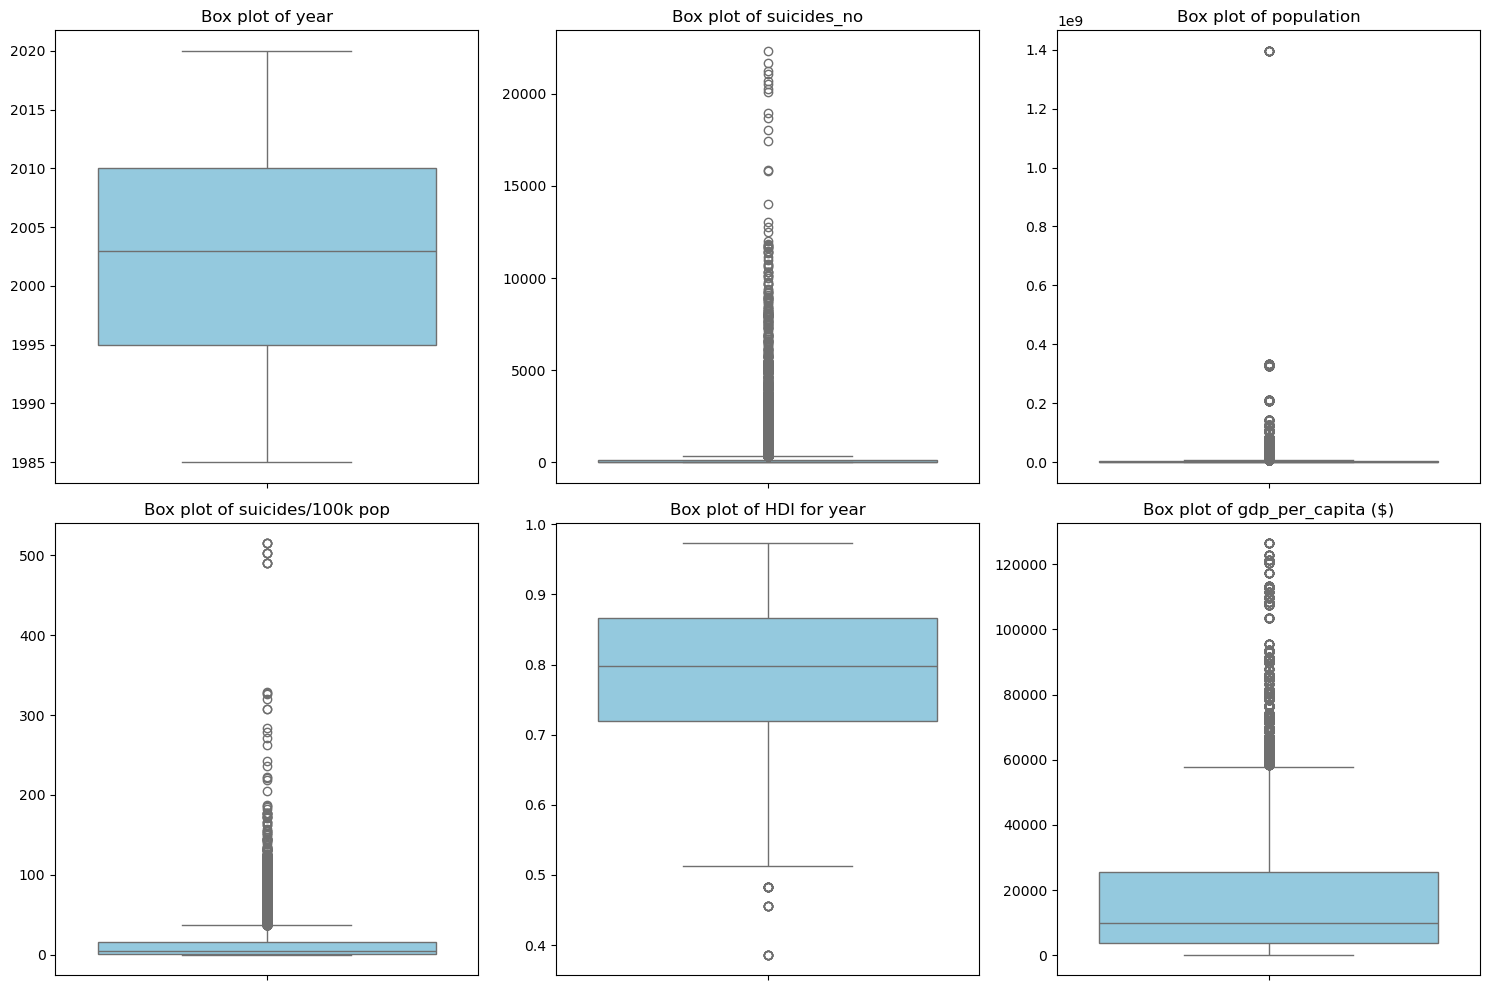

In [337]:
# Select numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Box plot of {column}')
    plt.ylabel('')  

plt.tight_layout()
plt.show()

box plot of suicides/100k and suicides_no shows these contain outliers

In [338]:
# Q1 = df['suicides/100k pop'].quantile(0.15)
# Q3 = df['suicides/100k pop'].quantile(0.85)
# IQR = Q3 - Q1
# lower_rate = Q1 - 1.5 * IQR
# upper_rate = Q3 + 1.5 * IQR

# Q1 = df['suicides_no'].quantile(0.15)
# Q3 = df['suicides_no'].quantile(0.85)
# IQR = Q3 - Q1
# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR

# # Filter outliers
# df_clean = df[(df['suicides/100k pop'].between(lower_rate, upper_rate)) & (df['suicides_no'].between(lower, upper))]
df_clean = df

### Data transformation and normalization.


In [339]:
# Ensure the columns are of string type before using .str accessor
df_clean['age'] = df_clean['age'].astype(str).str.replace(' years', '')
df_clean['gdp_for_year'] = df_clean['gdp_for_year'].astype(str).str.replace(',', '').astype(float)


df_clean.head(3)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21.0,312900,6.71,Albania1987,0.673,2.156625e+09,796.0,Generation X
1,Albania,1987,male,35-54,16.0,308000,5.19,Albania1987,0.673,2.156625e+09,796.0,Silent
2,Albania,1987,female,15-24,14.0,289700,4.83,Albania1987,0.673,2.156625e+09,796.0,Generation X


In [341]:
from sklearn.preprocessing import MinMaxScaler

#nomalization

num_cols = df_clean.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df_clean.loc[:,num_cols] = scaler.fit_transform(df_clean[num_cols])

#normalized data
df_clean.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita ($),generation
0,Albania,0.057143,male,15-24,0.000940,0.000224,0.013027,Albania1987,0.488817,0.000039,0.004322,Generation X
1,Albania,0.057143,male,35-54,0.000716,0.000220,0.010076,Albania1987,0.488817,0.000039,0.004322,Silent
2,Albania,0.057143,female,15-24,0.000627,0.000207,0.009377,Albania1987,0.488817,0.000039,0.004322,Generation X
3,Albania,0.057143,male,75+,0.000045,0.000015,0.008911,Albania1987,0.488817,0.000039,0.004322,G.I. Generation
4,Albania,0.057143,male,25-34,0.000403,0.000196,0.006368,Albania1987,0.488817,0.000039,0.004322,Boomers


## Exploratory Data Analysis (EDA) 


### Summary statistics. 

In [342]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita ($)
count,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000
mean,0.508763,0.010762,0.003623,0.023768,0.690541,0.010806,0.136539
std,0.269496,0.039104,0.024174,0.042547,0.151562,0.046454,0.153483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000134,0.000097,0.001175,0.568723,0.000212,0.027502
50%,0.514286,0.001209,0.000381,0.009474,0.701537,0.001100,0.077137
75%,0.714286,0.006088,0.001769,0.029606,0.819649,0.005556,0.200783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
# Cross-tabulation (e.g., suicides by age and sex)
pd.crosstab(df['age'], df['sex'], values=df['suicides/100k pop'], aggfunc='mean')

sex,female,male
age,,
15-24,0.007987,0.024659
25-34,0.008639,0.036308
35-54,0.011951,0.045021
5-14,0.000844,0.001395
55-74,0.013687,0.047024
75+,0.018244,0.069181


### Data visualization

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'suicides/100k pop'}>,
        <Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_for_year'}>],
       [<Axes: title={'center': 'gdp_per_capita ($)'}>, <Axes: >,
        <Axes: >]], dtype=object)

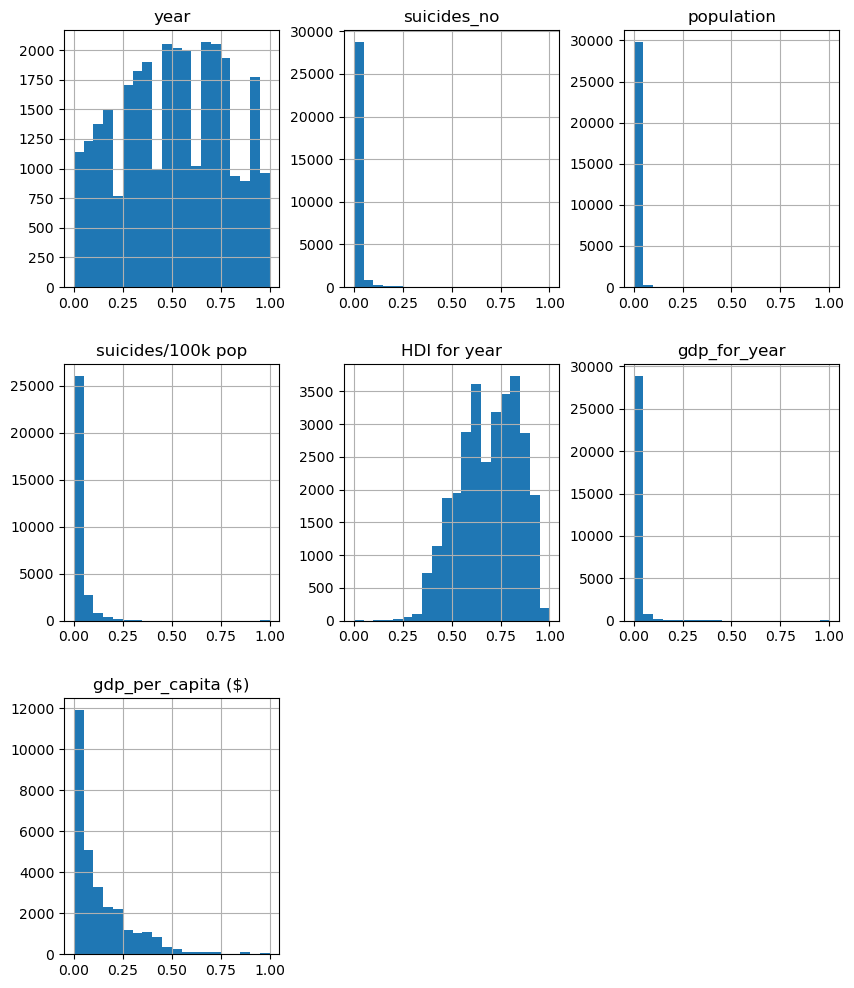

In [344]:
df_clean.hist(figsize=(10,12), bins = 20)

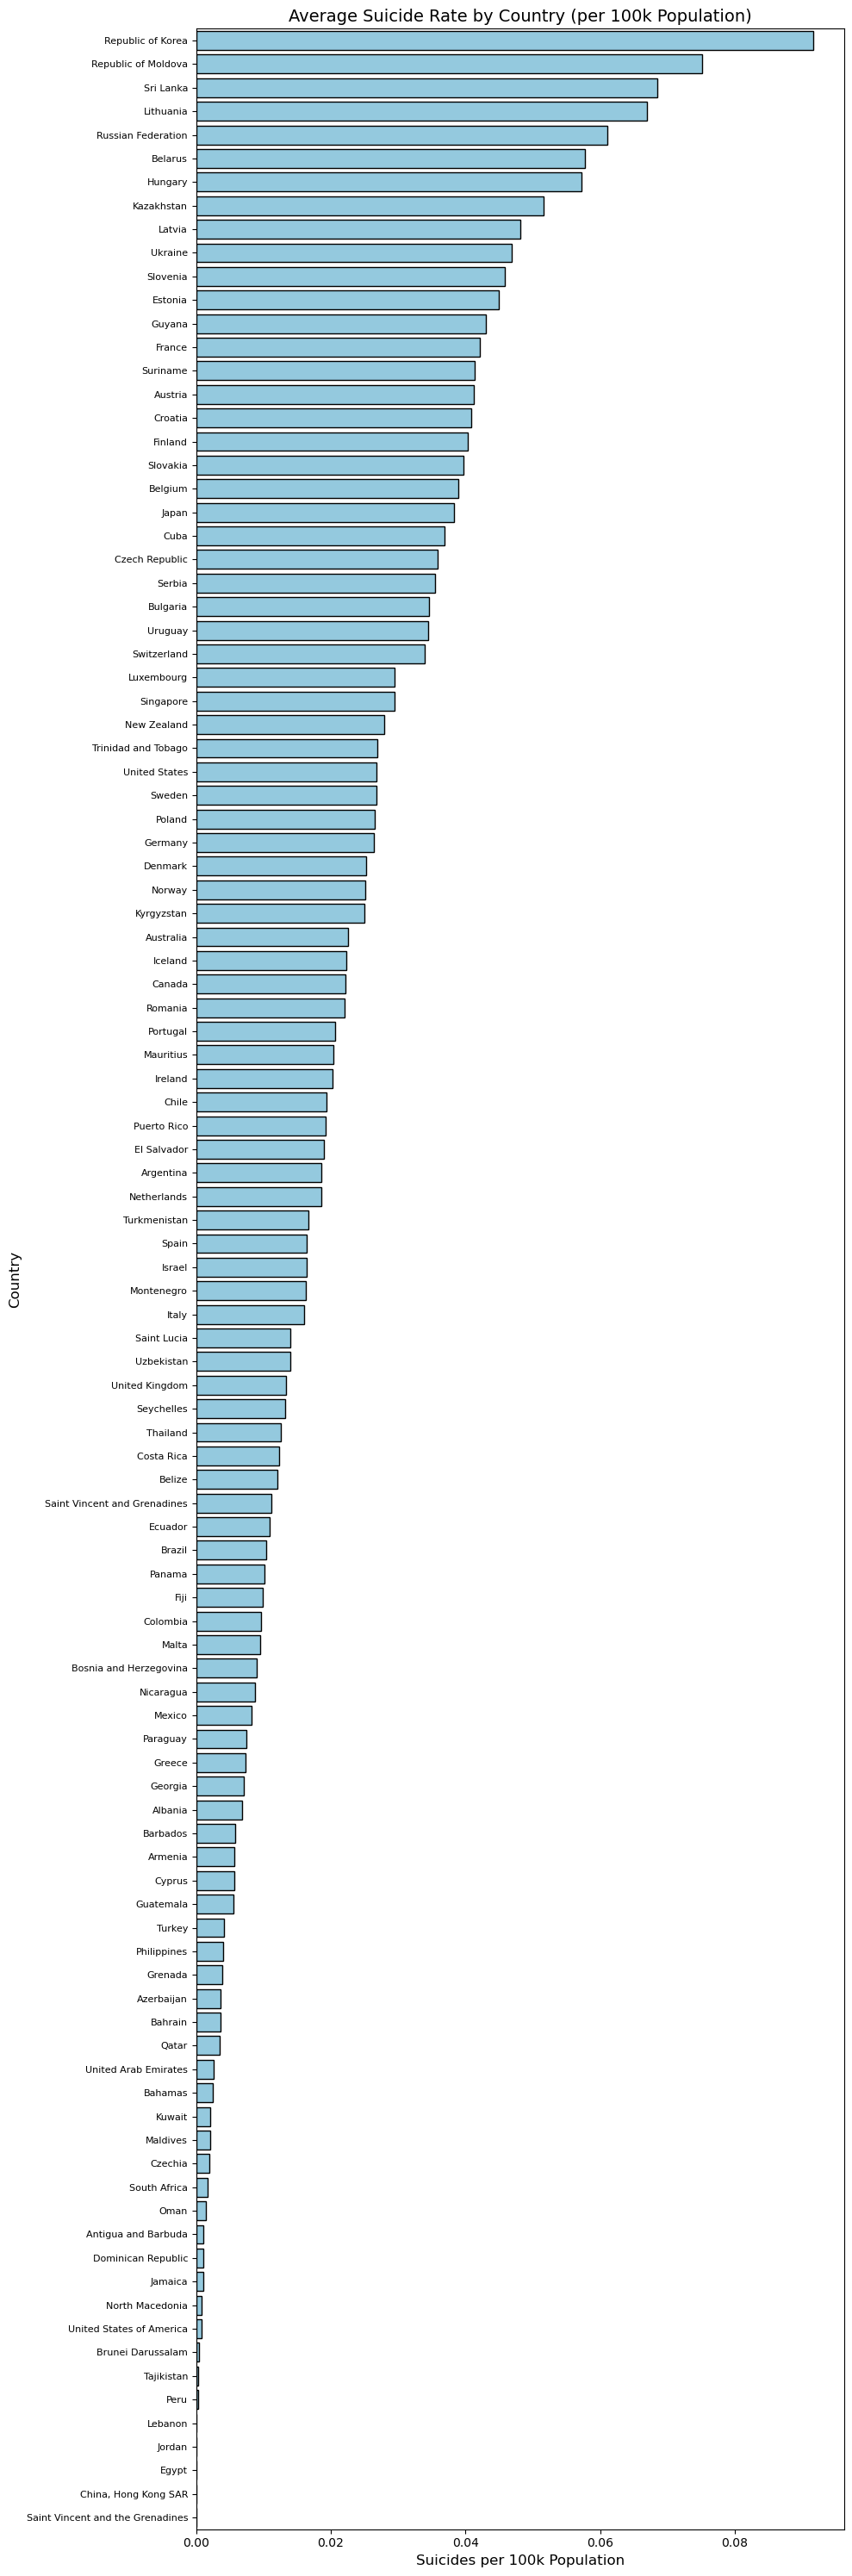

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average suicide rate per country
country_rates = df_clean.groupby('country')['suicides/100k pop'].mean().reset_index()
country_rates = country_rates.sort_values('suicides/100k pop', ascending=False)

# Create a simple bar plot
plt.figure(figsize=(10, 30))  # Increase height to accommodate all countries
sns.barplot(y='country',x='suicides/100k pop',data=country_rates,color='skyblue',edgecolor='black')

# Add titles/labels
plt.title('Average Suicide Rate by Country (per 100k Population)', fontsize=14)
plt.xlabel('Suicides per 100k Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Smaller font for country names

plt.tight_layout()
plt.show()

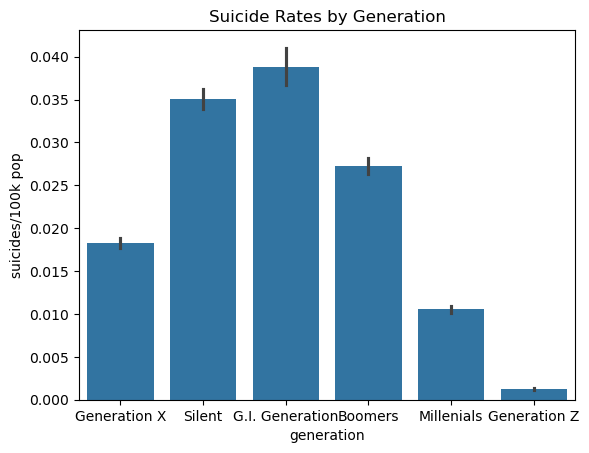

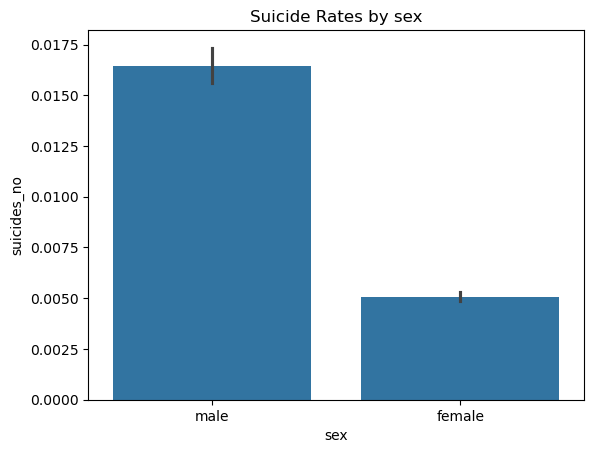

In [346]:
sns.barplot(x='generation', y='suicides/100k pop', data=df)
plt.title('Suicide Rates by Generation')
plt.show()

# Box plot by sex
sns.barplot(x='sex', y='suicides_no', data=df)
plt.title('Suicide Rates by sex')
plt.show()

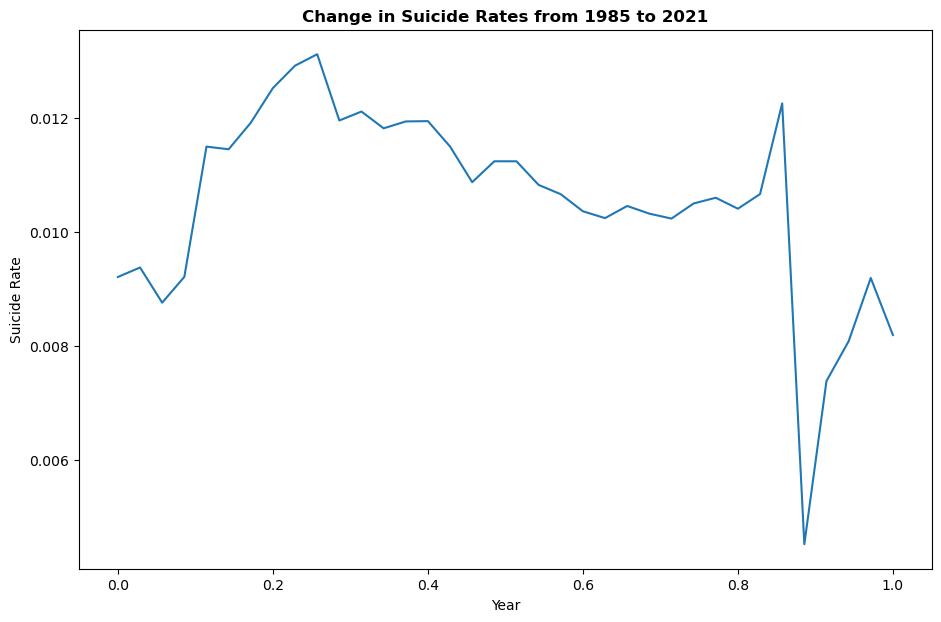

In [347]:
Df = df.groupby("year").mean(numeric_only=True)["suicides_no"]

plt.figure(figsize=(11,7))
plt.plot(Df.index, Df.values)
plt.xlabel("Year")
plt.ylabel("Suicide Rate")
plt.title("Change in Suicide Rates from 1985 to 2021",fontdict={"fontweight":"bold","fontsize":12})
plt.show()


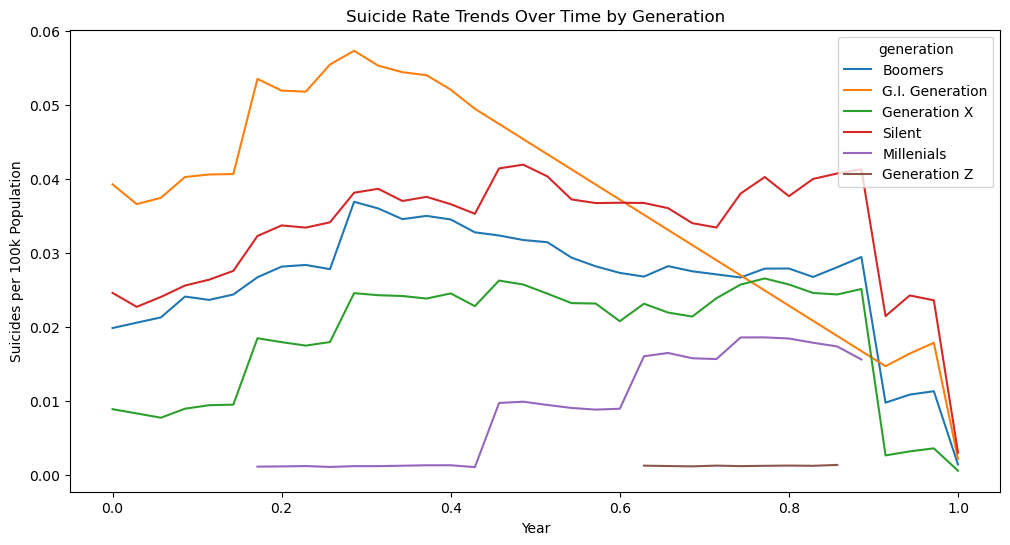

In [348]:
# Calculate average suicide rates per year AND generation
year_gen_rates = df_clean.groupby(['year', 'generation'])['suicides/100k pop'].mean().reset_index()

# Create plot with hue
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides/100k pop', hue='generation', data=year_gen_rates,)

plt.title('Suicide Rate Trends Over Time by Generation')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

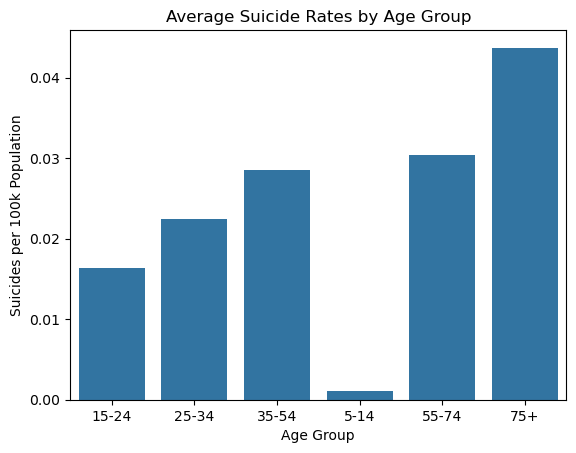

In [349]:
# Calculate average suicide rates per age group
age_rates = df_clean.groupby('age')['suicides/100k pop'].mean().reset_index()

# Create bar plot
sns.barplot(x='age', y='suicides/100k pop', data=age_rates)

plt.title('Average Suicide Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k Population')
plt.show()

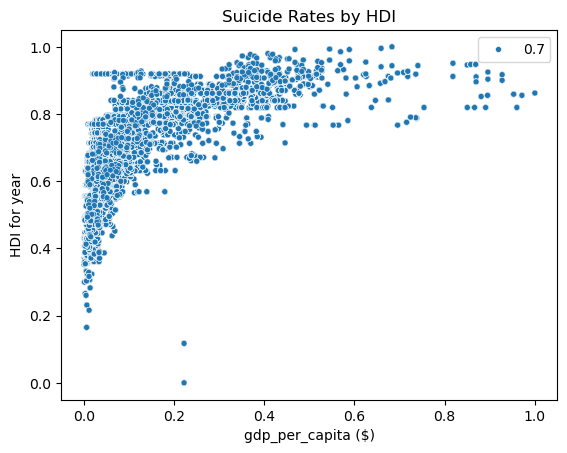

In [368]:
sns.scatterplot(x='gdp_per_capita ($)', y='HDI for year', data=df_clean,size=0.7)
plt.title('Suicide Rates by HDI')
plt.show()

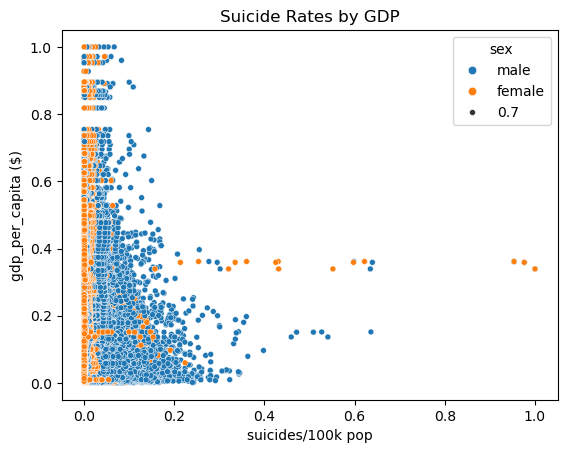

In [350]:
#scatter plot comparison of gdp and  suicide rtate

sns.scatterplot(x='suicides/100k pop', y='gdp_per_capita ($)', data=df_clean, hue='sex',size=0.7)
plt.title('Suicide Rates by GDP')
plt.show()



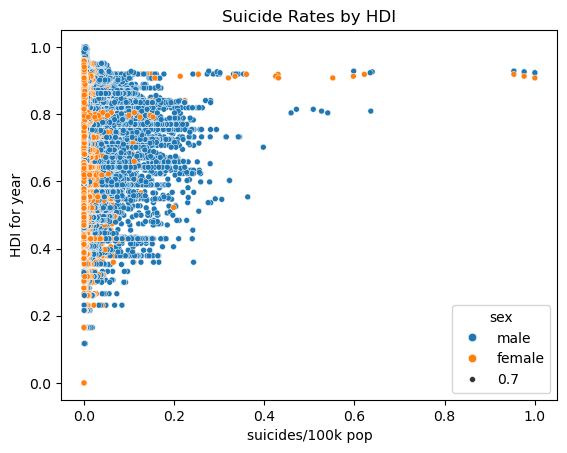

In [ ]:
sns.scatterplot(x='suicides/100k pop', y='HDI for year', data=df_clean, hue='sex',size=0.7)
plt.title('Suicide Rates by HDI')
plt.show()

### Identifying patterns and insights. 

## Correlation Analysis
##### Correlation analysis measures the linear relationship between numerical variables. It helps identify how changes in one feature are associated with changes in another.



In [352]:
numerical_cols = ['suicides/100k pop', 'suicides_no', 'population', 'gdp_per_capita ($)', 'gdp_for_year','HDI for year']
df_numerical = df_clean[numerical_cols]


correlation_matrix = df_numerical.corr(method='pearson') 
correlation_matrix.head()

,suicides/100k pop,suicides_no,population,gdp_per_capita ($),gdp_for_year,HDI for year
suicides/100k pop,1.000000,0.271079,-0.051241,0.006609,0.300623,0.103388
suicides_no,0.271079,1.000000,0.099034,0.060750,0.289768,0.139639
population,-0.051241,0.099034,1.000000,0.038901,0.280857,0.078343
gdp_per_capita ($),0.006609,0.060750,0.038901,1.000000,0.244193,0.688492
gdp_for_year,0.300623,0.289768,0.280857,0.244193,1.000000,0.227332


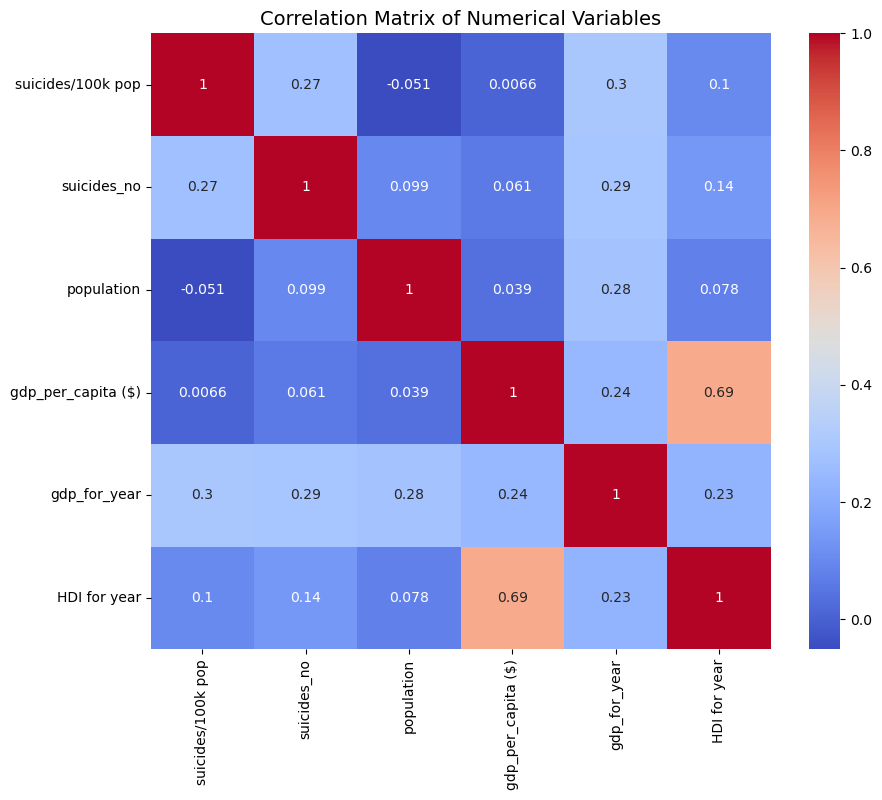

In [353]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.show()

GDP of the year,gdp per capita are the factors having correlation with the suicide rate

## covariance

Covariance Analysis¶
Covariance measures the directional relationship between two variables, showing how they vary together. Unlike correlation, it does not normalize values between -1 and 1.


In [354]:
# Calculate covariance matrix
cov_matrix = df_numerical.cov()
cov_matrix.head()

,suicides/100k pop,suicides_no,population,gdp_per_capita ($),gdp_for_year,HDI for year
suicides/100k pop,0.001810,0.000451,-0.000053,0.000043,0.000594,0.000667
suicides_no,0.000451,0.001529,0.000094,0.000365,0.000526,0.000828
population,-0.000053,0.000094,0.000584,0.000144,0.000315,0.000287
gdp_per_capita ($),0.000043,0.000365,0.000144,0.023557,0.001741,0.016016
gdp_for_year,0.000594,0.000526,0.000315,0.001741,0.002158,0.001601


<Axes: >

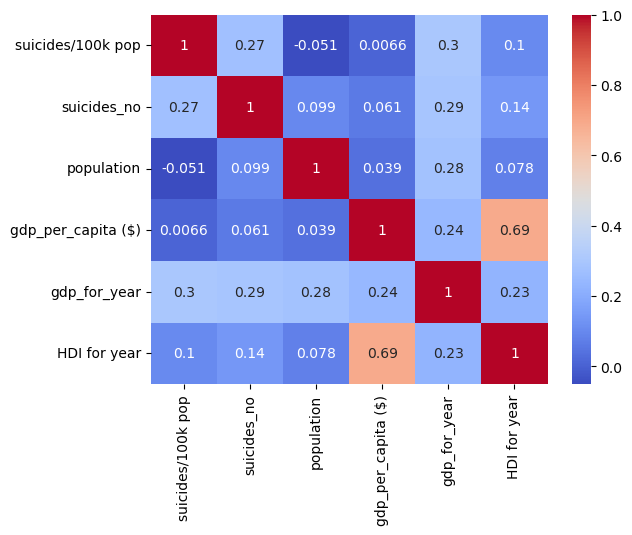

In [370]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)
cov_matrix_std = df_standardized.cov()
sns.heatmap(cov_matrix_std, annot=True, cmap='coolwarm')

#### Based on the covariance analysis of the Suicide data ,we are able to see that gdp and the population have an influence in the suicide rate, Also  gdp of the year have a significant affect in the suicide rate

# Statistical Analysis

### Descriptive and Inferential statistics. 

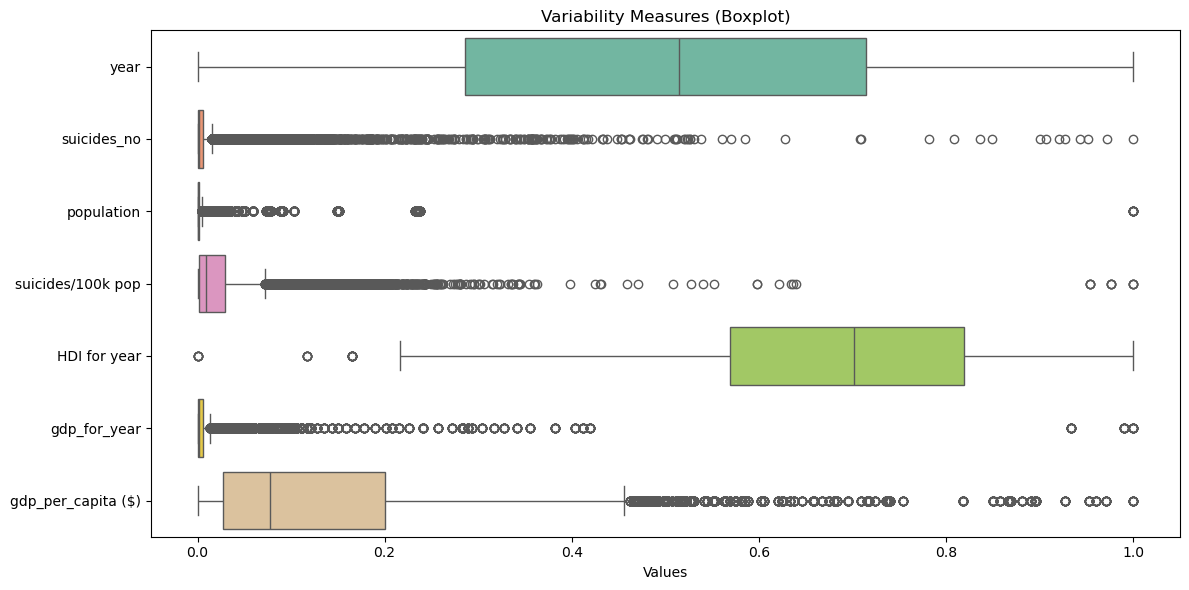

In [356]:
# Plot variability measures using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, orient='h', palette='Set2')
plt.title('Variability Measures (Boxplot)')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [357]:
from tabulate import tabulate

# Filter only numerical columns (using df_clean which contains cleaned data)
numerical_cols = df_clean.select_dtypes(include=['number']).columns

# Statistical Summary
stats = df_clean[numerical_cols].agg(['mean', 'std', 'var', 'skew', 'kurtosis']).round(3)
print("Statistical Summary:")
print(tabulate(stats, headers='keys', tablefmt='rounded_grid', showindex=True))
print("\n" + "="*80 + "\n")

# Measures of Dispersion
dispersion_measures = pd.DataFrame({
    'Range': df_clean[numerical_cols].max() - df_clean[numerical_cols].min(),
    'Variance': df_clean[numerical_cols].var(),
    'Standard Deviation': df_clean[numerical_cols].std()
}).reset_index().melt(id_vars='index', var_name='Measure')





Statistical Summary:
╭──────────┬────────┬───────────────┬──────────────┬─────────────────────┬────────────────┬────────────────┬──────────────────────╮
│          │   year │   suicides_no │   population │   suicides/100k pop │   HDI for year │   gdp_for_year │   gdp_per_capita ($) │
├──────────┼────────┼───────────────┼──────────────┼─────────────────────┼────────────────┼────────────────┼──────────────────────┤
│ mean     │  0.509 │         0.011 │        0.004 │               0.024 │          0.691 │          0.011 │                0.137 │
├──────────┼────────┼───────────────┼──────────────┼─────────────────────┼────────────────┼────────────────┼──────────────────────┤
│ std      │  0.269 │         0.039 │        0.024 │               0.043 │          0.152 │          0.046 │                0.153 │
├──────────┼────────┼───────────────┼──────────────┼─────────────────────┼────────────────┼────────────────┼──────────────────────┤
│ var      │  0.073 │         0.002 │        0.001 │   

### Hypothesis testing

Performing t-test¶

Null Hypothesis(H0): The sample mean is equal to the population mean.

Alternating Hypothesis(H1): The sample mean is different from the population mean.

In [358]:
from scipy.stats import ttest_1samp

sample_data = df_clean['suicides/100k pop'].sample(30, random_state=42)
population_mean = df_clean['suicides/100k pop'].mean()

print(f"Sample Mean: {sample_data.mean()}")
print(f"Population Mean: {population_mean}")

t_stat, p_value = ttest_1samp(sample_data, population_mean)

if p_value < 0.05:
    print(f"Reject the null hypothesis. p-value: {p_value}")
else:
    print(f"Fail to reject the null hypothesis. p-value: {p_value}")

Sample Mean: 0.022129306907054135
Population Mean: 0.02376752703704573
Fail to reject the null hypothesis. p-value: 0.7787127007148795


T-test
The sucide rate of the by the male differ from the rate of female

Null Hypothesis(H0): No significant difference in suicide rate between male and femle

Alternating Hypothesis(H1):There is a significant difference in suicide rate of male and female

In [359]:
from scipy.stats import ttest_ind

# Split data into male and female groups
male = df_clean[df_clean['sex'] == 'male']['suicides/100k pop']
female = df_clean[df_clean['sex'] == 'female']['suicides/100k pop']

# Perform t-test
t_stat, p_value = ttest_ind(male, female, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: Suicide rates differ significantly by gender.")
else:
    print("No significant difference in suicide rates by gender.")

T-statistic: 58.24, P-value: 0.0000
Reject null hypothesis: Suicide rates differ significantly by gender.


ANOVA test
Testing the effect of sucide rate of the by the age group

Null Hypothesis(H0): The means of all groups are equal. No significant difference in suicide rate across age group

Alternating Hypothesis(H1):There is a significant difference in suicide rate across age group

In [360]:
from scipy.stats import f_oneway

grouped_data = list(df.groupby('generation')['suicides/100k pop'].apply(list))

f_stat, p_value = f_oneway(*grouped_data)

# Display the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: Significant differences exist in suicide rates across different generations.")
else:
    print("Fail to Reject Null Hypothesis: No significant differences in suicide rates across different generations.")



F-Statistic: 438.48041230368557
P-Value: 0.0
Reject Null Hypothesis: Significant differences exist in suicide rates across different generations.
